# Détectez des faux billet projet 10 Tanguy Mathieu

In [1]:
# Librairies de calcul:
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
import statsmodels

# Libairies de representation graphique:
import matplotlib.pyplot as plt
import seaborn as sns

# Pour la regression lineaire:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score
from sklearn.metrics import*

# Pour la regression logistique:
from statsmodels.api import Logit
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import  accuracy_score , precision_score, recall_score,confusion_matrix
from sklearn.metrics import roc_auc_score , roc_curve, accuracy_score , precision_score, recall_score

# Pour le K-mean:
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Chargement du dossier billet avec séparateur

In [2]:
billet= pd.read_csv('billets.csv',sep = ';') 
billet_test = pd.read_csv('billets_production.csv',sep=';')
billet.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


# 1/ OBSERVATION DES DONNEES

In [3]:
billet.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [4]:
billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


### index des valeurs manquantes et longueur

In [5]:
print(billet.index[billet.isnull().any(axis=1)])
len(billet.index[billet.isnull().any(axis=1)])

Int64Index([  72,   99,  151,  197,  241,  251,  284,  334,  410,  413,  445,
             481,  505,  611,  654,  675,  710,  739,  742,  780,  798,  844,
             845,  871,  895,  919,  945,  946,  981, 1076, 1121, 1176, 1303,
            1315, 1347, 1435, 1438],
           dtype='int64')


37

### calcul de la proportion des données Nan dans marge bord inf

In [6]:
prop_null = round(len(billet.index[billet.isnull().any(axis=1)])*100/len(billet['margin_low']),2)
print(prop_null,'%')

2.47 %


In [7]:
billet.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


# 2/ REGRESSION LINEAIRE POUR IMPUTER LES VALEURS MANQUANTES

###  La régression linéaire utilise une technique d’estimation choisie entre une variable dépendante et une ou plusieurs variables explicatives pour former une équation linéaire estimant les valeurs de la variable dépendante. 

### modèle avec scikit-learn

In [8]:
billet_sans_nan = billet.dropna()

x = billet_sans_nan[["is_genuine","diagonal","height_left","height_right", "margin_up", "length"]]
y = billet_sans_nan['margin_low'] # Target

reg_lin = LR()
model_lin =reg_lin.fit(x, y)
reg_lin.predict(x)
R2 = reg_lin.score(x,y)
print('le coefficiant de determination R2 est de',round(R2*100,2),'%')


le coefficiant de determination R2 est de 61.69 %


### On peut dire que ce R2 représente la qualité de la régression mis en place . 
### Le R2 évalue la performance(ou erreur, résidus) du modèle par rapport au niveau de variation(variance) présent dans les données.

# Test d'hypothèse

### régression multiple avec statsmodels

In [53]:
reg_ols = smf.ols('margin_low~+is_genuine+margin_up+height_right+height_left+length+diagonal ', data=billet_sans_nan).fit()


## Normalité des résidus

### calcul des résidus


In [10]:
y_pred=reg_ols.predict(x)
resid= y-y_pred

In [11]:
print("Mean Absolute Error MAE : ", mean_absolute_error(y,y_pred )) # moyenne des valeurs absolue des erreurs
print("Mean Squared Error MSE : ",mean_squared_error(y,y_pred)) # moyenne des carrés des erreurs
print("Erreur Quadratique Moyenne RMSE : ", np.sqrt(mean_squared_error(y,y_pred)) ) # erreur quadratique moyenne
print("Median Absolute Error : ", median_absolute_error(y,y_pred )) # median des valeurs absolue des erreurs

Mean Absolute Error MAE :  0.3158126668446074
Mean Squared Error MSE :  0.16870708983467025
Erreur Quadratique Moyenne RMSE :  0.41073968621825463
Median Absolute Error :  0.2566392903963095


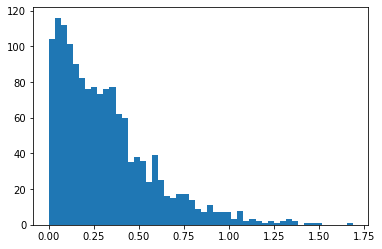

In [12]:
erreur=np.abs(y-y_pred)
plt.hist(erreur,bins=50)
plt.show()

### La quantité d'erreurs suit une loi exponentielle, plus la valeur de l'erreur augmente plus la quantité diminue

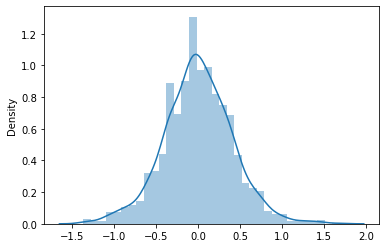

In [13]:
sns.distplot(resid)
plt.show()


#### la distribution des résidus est bien symétrique autour de l'axe 0

### Droite de Henry pour la linéarité des résidus 

la distribution des résidus 


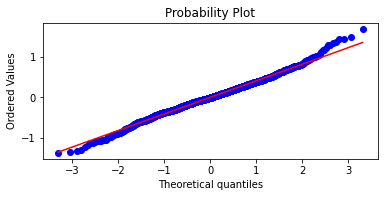

In [14]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(resid, plot=ax, fit=True)
print("la distribution des résidus ")

#### Mise en relation les valeurs des résidus (abscisses) avec des valeurs construites sous l'hypothèse que la distribution des résidus est normale.
la droite de Henry est une méthode graphique pour ajuster une distribution théorique gaussienne à celle d'une série d'observations.

## Colinéarité des variables 

#### La multicolinéarité se produit lorsqu’il existe deux ou plusieurs variables indépendantes dans un modèle de régression multiple, qui ont une forte corrélation entre elles.Lorsque certaines caractéristiques sont fortement corrélées, nous pouvons avoir des difficultés à distinguer leurs effets individuels sur la variable dépendante. 
#### La multicolinéarité peut être détectée à l’aide de diverses techniques,  l’une de ces techniques étant le facteur d’inflation de la variance (VIF).


In [15]:
variables = reg_ols.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[4.725732131263029,
 1.5960903251807717,
 1.3208356332473357,
 1.1737111515376208,
 3.6132551150015257,
 1.0281994979080677]

### Ici, tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.

## Homoscédasticité

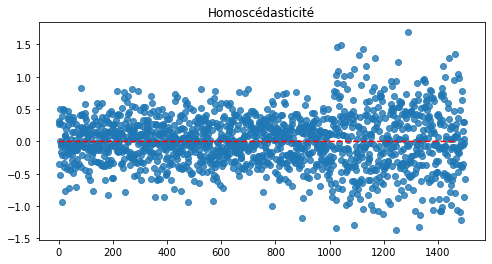

In [16]:
plt.subplots(figsize=(8, 4))
plt.scatter(x=billet_sans_nan.index, y=resid, alpha=0.8)
plt.plot(np.repeat(0, len(billet_sans_nan.index)+2), color="red", linestyle='--')
plt.title("Homoscédasticité")
plt.show()

#### On appelle homoscédasticité l'égalité de la variance d'une variable quelque soit l'échantillon qui y est puisé (les résidus sont dispersés aléatoirement, la variance d'un individu à un autre est constante);
#### Lorsque la variance diffère selon les échantillons, on parle alors d'hétéroscédasticité.

### Test de Breusch Pagan

In [17]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_ols.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.46395797159393e-33


### La p-value est ici très inférieure au seuil, on ne peut pas rejeter l'hypothèse nulle d'homoscédasticité. L'hypothèse d'homoscédasticité de notre régression linéaire est donc considérée comme vérifiée au risque alpha 5 % 

## Application du modèle sur les données Nan

### sélection des Nan

In [18]:
billet_nan =billet.loc[billet['margin_low'].isna()]

### Prédiction sur les valeurs manquantes de margin_low

In [19]:
x_nan=billet_nan[["is_genuine","diagonal","height_left","height_right", "margin_up", "length"]]
billet_nan['margin_low']=reg_ols.predict(x_nan)
billet_nan.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.064954,3.25,112.79
99,True,171.93,104.07,104.18,4.111990,3.14,113.08
151,True,172.07,103.80,104.38,4.134003,3.02,112.93
197,True,171.45,103.66,103.80,3.993571,3.62,113.27
241,True,171.83,104.14,104.06,4.140399,3.02,112.36


### concaténation des données pour retrouver 1500 valeurs

In [20]:
billet_concat = pd.concat([billet_sans_nan, billet_nan] ,axis = 0)
billet_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


### vérification des comptes vrai/faux par colonne

In [21]:
prop = billet_concat.groupby(['is_genuine']).count()
prop

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,500,500,500,500,500,500
True,1000,1000,1000,1000,1000,1000


### RAPPEL: 
L'imputation des valeurs manquantes auraient pû aussi se faire en utilisant la moyenne ou la médiane , ou nous aurions pû également supprimer ces valeurs qui ne représentaient que 2.47% du jeu de données .On aurait aussi pu utiliser tout simplement des règles de calcul simple comme Pythagore puisque nous connaissons la longueur et la diagonal par exemple

## IMPORTANT: il aurait été bon que dans le jeu de données pour entrainer les modèles il y ait autant de billet vrai que de faux pour que les prédiction soit plus fines

# 3/ ANALYSE DESCRIPTIVE DES DONNEES

### proportion des billets vrai/faux

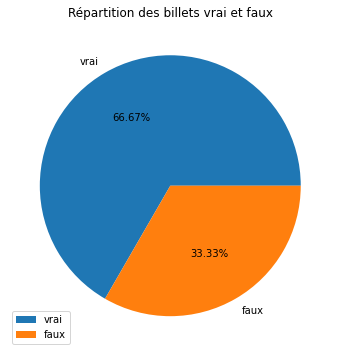

In [22]:
prop = billet_concat.groupby(['is_genuine'])['diagonal'].count()
plt.figure(figsize = (6,6))
plt.pie(labels = ['vrai','faux'],
        x=[prop.iloc[1],prop.iloc[0]],
        autopct='%.2f%%')
plt.legend()
plt.title('Répartition des billets vrai et faux')
plt.show()

### visualisation des données

<Figure size 72x72 with 0 Axes>

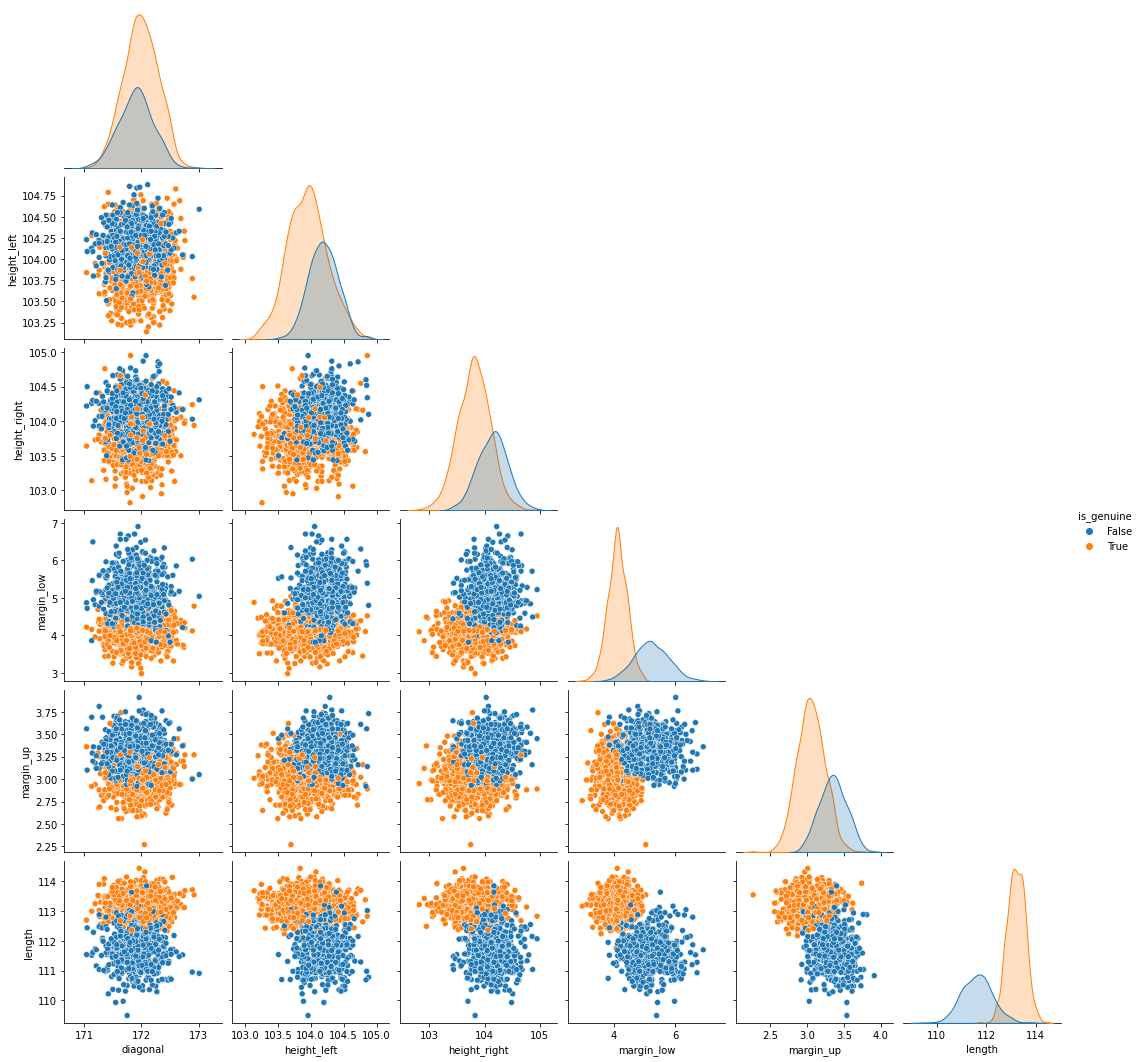

In [23]:
plt.figure(figsize=(1, 1))
sns.pairplot(billet_concat,hue='is_genuine',corner=True)
plt.show()

### graphiques de représentation des outliers 

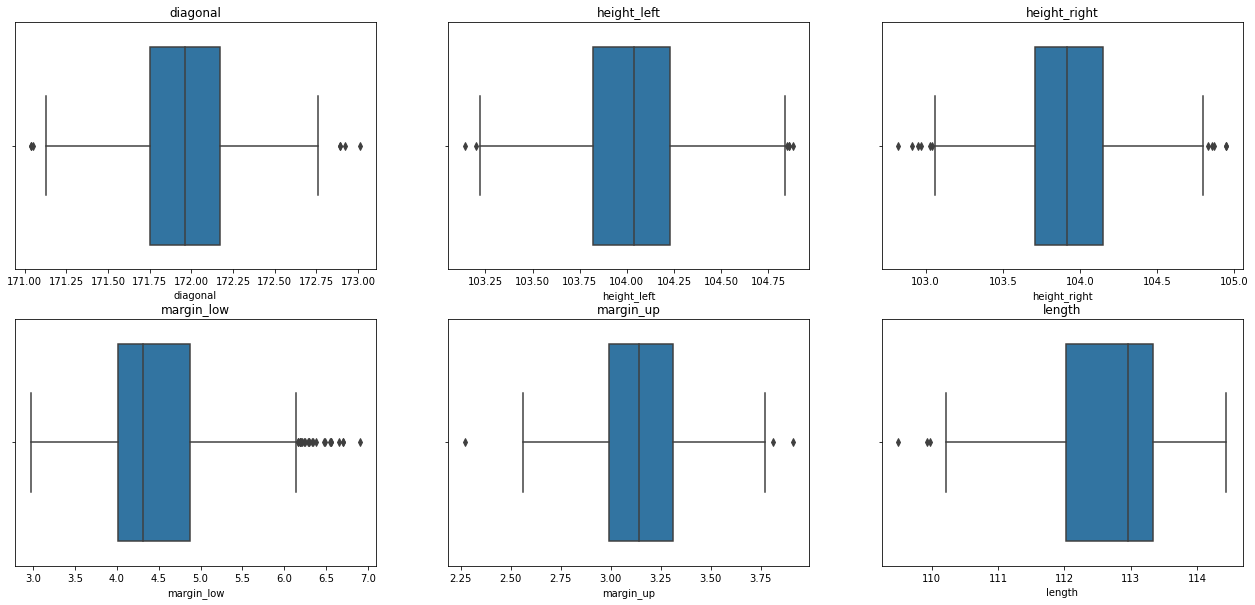

In [24]:
ligne= 2  
colonne = 3  
initial = 1  

fig = plt.figure(figsize=(22,10))

for i in billet_concat.loc[:, billet_concat.columns != "is_genuine"]:
    plt.subplot(ligne,colonne,initial)
    plt.title('{}'.format(i,ligne,colonne,initial))
    plt.xlabel(i)
    sns.boxplot(x = billet[i])
    initial = initial + 1
plt.show()

# 4/ REGRESSION LOGISTIQUE

## je n'ai pas spliter le jeu de données car il nous a déjà été fourni un jeu de données test 

### La régression logistique est un modèle statistique permettant d’étudier les relations entre un ensemble de variables qualitatives X et une variable qualitative Y (Target). Il s’agit d’un modèle linéaire généralisé utilisant une fonction logistique comme fonction de lien. 

## Création du modèle

In [25]:
billet_reg = billet_concat
y_billet_reg= billet_reg['is_genuine']
x_billet_reg= billet_reg.drop('is_genuine',axis=1)
x_billet_reg = sm.tools.add_constant(x_billet_reg)
reg_log = Logit(endog=y_billet_reg,exog=x_billet_reg)
reg_log = reg_log.fit()
print(reg_log.summary())

Optimization terminated successfully.
         Current function value: 0.026349
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1493
Method:                           MLE   Df Model:                            6
Date:                Mon, 21 Nov 2022   Pseudo R-squ.:                  0.9586
Time:                        09:02:21   Log-Likelihood:                -39.524
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -230.4143    249.954     -0.922      0.357    -720.316     259.487
diagonal         0.256

### on observe que 2 variables(diagonal et height left) ont des résultats alpha supérieur à 5%, on va donc refaire un modèle sans ces données pour voir il y a un impact significatif sur les résultats

In [26]:
x_billet_reg1 = billet_reg[["height_right","margin_low", "margin_up", "length"]]
x_billet_reg1 = sm.add_constant(x_billet_reg1)
y_billet_reg= billet_reg['is_genuine']
reg_log1 = Logit(endog=y_billet_reg,exog=x_billet_reg1)
reg_log1 = reg_log1.fit()
print(reg_log1.summary2())

Optimization terminated successfully.
         Current function value: 0.026815
         Iterations 13
                         Results: Logit
Model:                Logit            Pseudo R-squared: 0.958   
Dependent Variable:   is_genuine       AIC:              90.4453 
Date:                 2022-11-21 09:02 BIC:              117.0114
No. Observations:     1500             Log-Likelihood:   -40.223 
Df Model:             4                LL-Null:          -954.77 
Df Residuals:         1495             LLR p-value:      0.0000  
Converged:            1.0000           Scale:            1.0000  
No. Iterations:       13.0000                                    
-----------------------------------------------------------------
               Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
-----------------------------------------------------------------
const        -285.3339 139.1600 -2.0504 0.0403 -558.0825 -12.5852
height_right   -3.3223   1.1166 -2.9752 0.0029   -5.5109  -1.1337

### test de binarité

In [27]:
print(billet_reg['is_genuine'].nunique())

2


## Régression avec toutes les données et création des colonnes probabilité et prediction

In [28]:
billet_reg['probabilité_log'] = reg_log.predict(x_billet_reg)
billet_reg['prediction_log'] = (reg_log.predict(x_billet_reg) >= 0.5).astype(int)
billet_reg.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,probabilité_log,prediction_log
0,True,171.81,104.86,104.95,4.52,2.89,112.83,0.817870,1
1,True,171.46,103.36,103.66,3.77,2.99,113.09,0.999995,1
2,True,172.69,104.48,103.50,4.40,2.94,113.16,0.999819,1
3,True,171.36,103.91,103.94,3.62,3.01,113.51,0.999999,1
4,True,171.73,104.28,103.46,4.04,3.48,112.54,0.831665,1


### matrice de confusion et graphique

Confusion Matrix
[[491   9]
 [  3 997]]


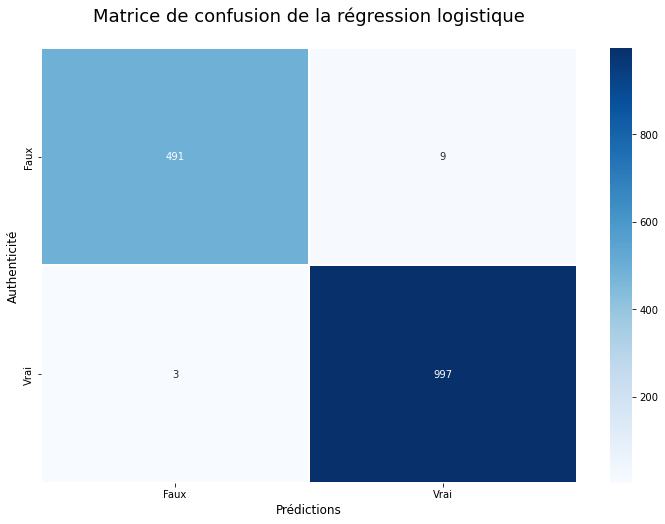

In [29]:
confusion = confusion_matrix(y_billet_reg, billet_reg['prediction_log'])
print('Confusion Matrix')
print(confusion)
plt.figure(figsize=(12,8))
sns.heatmap(confusion,
            annot = True,
            fmt = ".3g", 
            cmap = sns.color_palette('Blues', as_cmap=True),
            linecolor = "white",
            linewidths = 0.3,
            xticklabels = ["Faux","Vrai"],
            yticklabels=["Faux","Vrai"]
            )
plt.xlabel("Prédictions",size=12)
plt.ylabel("Authenticité",size=12)
plt.title("Matrice de confusion de la régression logistique\n",size=18)
plt.show()

In [30]:
print('Précision, Accuracy:',round(accuracy_score(y_billet_reg, billet_reg['prediction_log']),3))
print('Spécificité:',round(precision_score(y_billet_reg, billet_reg['prediction_log']),3))
print('Sensibilité,Recall:',recall_score(y_billet_reg, billet_reg['prediction_log']))
print('Score F1:',recall_score(y_billet_reg, billet_reg['prediction_log']))

Précision, Accuracy: 0.992
Spécificité: 0.991
Sensibilité,Recall: 0.997
Score F1: 0.997


#### ACCURACY : (précision) ratio de prédictions justes. C'est une bonne mesure si le jeu de données est symétrique et si les faux positifs et faux négatifs ont la même importance/le même poid. Accuracy = TP+TN/total¶
#### PRECISION : (spécificité) ratio de vrais positifs sur le total des prédictions positives. Precision = TN/TN+FP
#### RECALL : (sensibilité) - Le ratio de positif prédit correctement parmi tous les positifs. Recall = TP/TP+FN
#### F1 SCORE - c'est une moyenne pondérée de la sensibilité et de la spécificité. On prend donc en compte les faux positifs et les faux négatifs en compte. Ce score, bien que moins intuitif que la précision est plus juste en particuliers pour les jeux de données dissymétriques. F1 Score = 2(Recall Precision) / (Recall + Precision)


# régression sans diagonal ni height left

In [31]:
billet_reg['probabilité_log1'] = reg_log1.predict(x_billet_reg1)
billet_reg['prediction_log1'] = (reg_log1.predict(x_billet_reg1) >= 0.5).astype(int)
billet_concat.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,probabilité_log,prediction_log,probabilité_log1,prediction_log1
0,True,171.81,104.86,104.95,4.52,2.89,112.83,0.817870,1,0.900920,1
1,True,171.46,103.36,103.66,3.77,2.99,113.09,0.999995,1,0.999992,1
2,True,172.69,104.48,103.50,4.40,2.94,113.16,0.999819,1,0.999908,1
3,True,171.36,103.91,103.94,3.62,3.01,113.51,0.999999,1,0.999999,1
4,True,171.73,104.28,103.46,4.04,3.48,112.54,0.831665,1,0.905696,1


Confusion Matrix
[[491   9]
 [  3 997]]


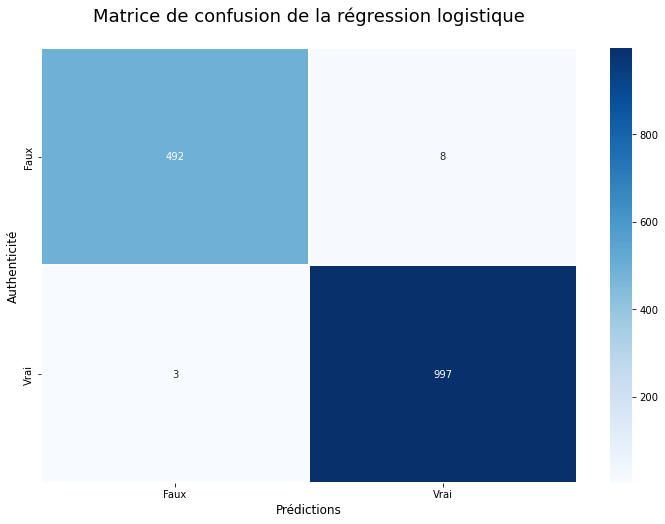

In [32]:
confusion1 = confusion_matrix(y_billet_reg, billet_reg['prediction_log1'])
print('Confusion Matrix')
print(confusion)
plt.figure(figsize=(12,8))
sns.heatmap(confusion1,
            annot = True,
            fmt = ".3g", 
            cmap = sns.color_palette('Blues', as_cmap=True),
            linecolor = "white",
            linewidths = 0.3,
            xticklabels = ["Faux","Vrai"],
            yticklabels=["Faux","Vrai"]
            )
plt.xlabel("Prédictions",size=12)
plt.ylabel("Authenticité",size=12)
plt.title("Matrice de confusion de la régression logistique\n",size=18)
plt.show()

In [33]:
print('Précision, Accuracy:',round(accuracy_score(y_billet_reg, billet_reg['prediction_log1']),3))
print('Spécificité:',round(precision_score(y_billet_reg, billet_reg['prediction_log1']),3))
print('Sensibilité,Recall:',recall_score(y_billet_reg, billet_reg['prediction_log1']))
print('Score F1:',recall_score(y_billet_reg, billet_reg['prediction_log1']))

Précision, Accuracy: 0.993
Spécificité: 0.992
Sensibilité,Recall: 0.997
Score F1: 0.997


# les résultats entre les 2 régressions logistiques sont identiques à peu de choses près , je conserverai donc le modèle avec toutes colonnes


### Efficacité du recepteur avec la courbe de ROC

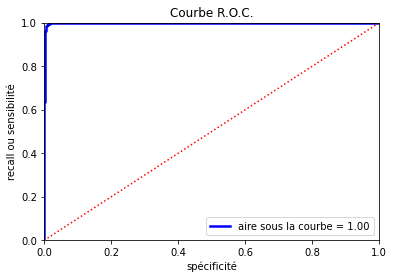

In [52]:
fpr, tpr, _ = roc_curve(billet_reg["is_genuine"],billet_reg['probabilité_log'])
roc_auc = roc_auc_score(billet_reg["is_genuine"],billet_reg['probabilité_log'])

plt.title("Courbe R.O.C.")
plt.plot(fpr,
        tpr,
        color="blue",
        linewidth=2.5,
        label="aire sous la courbe = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1],color="red", linestyle=":")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc = "lower right")
plt.ylabel("recall ou sensibilité")
plt.xlabel("spécificité")
plt.show()

## Comme avec les calculs de précision,d'accuracy, de spécificité et ainsi qu'avec la matrice de confusion , on peut voir qu'avec le ROC l'aire sous la courbe est estimé à 1 donc un modèle quasi parfait

# Application du modèle sur données tests

In [35]:
billet_test = pd.read_csv('billets_production.csv',sep=',')
billet_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [36]:
x_test = billet_test.drop('id',axis=1)
x_test = sm.add_constant(x_test)
billet_test['probabilité_log'] = reg_log.predict(x_test)
billet_test['prediction_log'] = (reg_log.predict(x_test) >= 0.5).astype(int)
print(billet_test[['id','probabilité_log','prediction_log']])


print("Indentification des billets:")
for i, k in zip(billet_test['prediction_log'],billet_test['id']):
    if i == 1:
        print('Le billet','{}'.format(k),'est vrai')
    else:
        print('Le billet','{}'.format(k),'est faux')

    id  probabilité_log  prediction_log
0  A_1         0.000035               0
1  A_2         0.000002               0
2  A_3         0.000008               0
3  A_4         0.994063               1
4  A_5         0.999993               1
Indentification des billets:
Le billet A_1 est faux
Le billet A_2 est faux
Le billet A_3 est faux
Le billet A_4 est vrai
Le billet A_5 est vrai


# 5/ K-MEANS

### C'est un algorithmes de clustering qui permet d'analyser un jeu de données caractérisées par un ensemble de descripteurs, afin de regrouper les données “similaires” en groupes (ou clusters). 
### On parle alors de "classification"

In [37]:
billet_km = billet_concat
y_billet_km= billet_km['is_genuine']
x_billet_km=billet_km[["diagonal","height_left","height_right",
                              "margin_up",'margin_low', "length"]]
x_billet_km=x_billet_km.values

In [38]:
km = KMeans(n_clusters=2,random_state=0).fit(x_billet_km)

### définition des centroides

In [39]:
centroids_km = km.cluster_centers_

### Affichage du clustering par projection des individus sur le premier plan factoriel

In [40]:
pca_km = decomposition.PCA(n_components=3).fit(x_billet_km)
acp_km = PCA(n_components=3).fit_transform(x_billet_km)

### graphique de clustering avec centroides


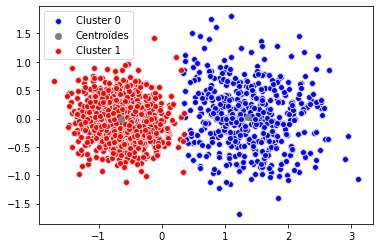

In [41]:
project_centroids_km = pca_km.transform(centroids_km)
for couleur,k in zip(['blue','red'],[0,1]):
    plt.scatter(acp_km[km.labels_==k,0],acp_km[km.labels_==k,1],c=couleur,edgecolors="#D3D3D3",label="Cluster {}".format(k))
    plt.legend()
    plt.scatter(project_centroids_km[:,0],project_centroids_km[:,1],color="grey",label="Centroïdes")
plt.show()

In [42]:
billet_km['probabilité_km'] = km.predict(x_billet_km)
billet_km['prediction_km'] = (km.predict(x_billet_km) >= 0.5).astype(int)
billet_km.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,probabilité_log,prediction_log,probabilité_log1,prediction_log1,probabilité_km,prediction_km
0,True,171.81,104.86,104.95,4.52,2.89,112.83,0.817870,1,0.900920,1,1,1
1,True,171.46,103.36,103.66,3.77,2.99,113.09,0.999995,1,0.999992,1,1,1
2,True,172.69,104.48,103.50,4.40,2.94,113.16,0.999819,1,0.999908,1,1,1
3,True,171.36,103.91,103.94,3.62,3.01,113.51,0.999999,1,0.999999,1,1,1
4,True,171.73,104.28,103.46,4.04,3.48,112.54,0.831665,1,0.905696,1,1,1


### matrice de confusion

In [43]:
matrix_conf_km = confusion_matrix(y_billet_km, billet_concat['prediction_km'])
print(matrix_conf_km)

[[481  19]
 [  2 998]]


### graphique matrice de confusion

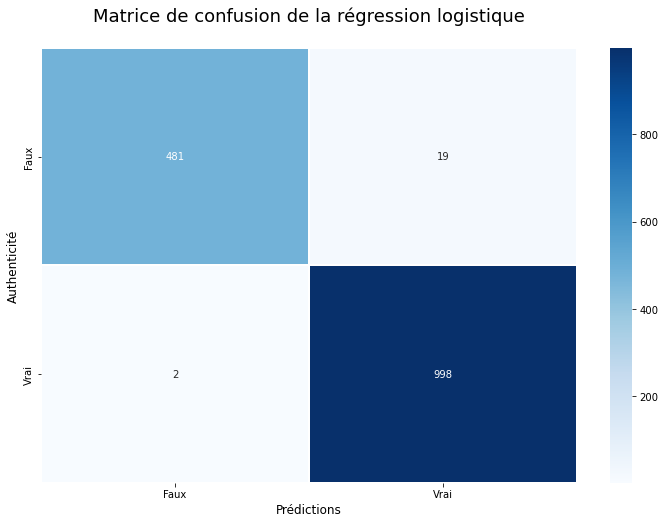

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(matrix_conf_km,
            annot = True,
            fmt = ".3g", 
            cmap = sns.color_palette('Blues', as_cmap=True),
            linecolor = "white",
            linewidths = 0.3,
            xticklabels = ["Faux","Vrai"],
            yticklabels=["Faux","Vrai"]
            )
plt.xlabel("Prédictions",size=12)
plt.ylabel("Authenticité",size=12)
plt.title("Matrice de confusion de la régression logistique\n",size=18)
plt.show()

In [45]:
print('Précision, Accuracy:',round(accuracy_score(y_billet_km, billet_km['prediction_km']),3))
print('Spécificité:',round(precision_score(y_billet_km, billet_km['prediction_km']),3))
print('Sensibilité,Recall:',recall_score(y_billet_km, billet_km['prediction_km']))
print('Score F1:',recall_score(y_billet_km, billet_km['prediction_km']))

Précision, Accuracy: 0.986
Spécificité: 0.981
Sensibilité,Recall: 0.998
Score F1: 0.998


#### ACCURACY : (précision) ratio de prédictions justes. C'est une bonne mesure si le jeu de données est symétrique et si les faux positifs et faux négatifs ont la même importance/le même poid. Accuracy = TP+TN/total

#### PRECISION : (spécificité) ratio de vrais positifs sur le total des prédictions positives. Precision = TN/TN+FP

#### RECALL : (sensibilité) - Le ratio de positif prédit correctement parmi tous les positifs. Recall = TP/TP+FN

#### F1 SCORE - c'est une moyenne pondérée de la sensibilité et de la spécificité. On prend donc en compte les faux positifs et les faux négatifs en compte. Ce score, bien que moins intuitif que la précision est plus juste en particuliers pour les jeux de données dissymétriques. F1 Score = 2(Recall Precision) / (Recall + Precision)

### Efficacité du recepteur avec la courbe de ROC

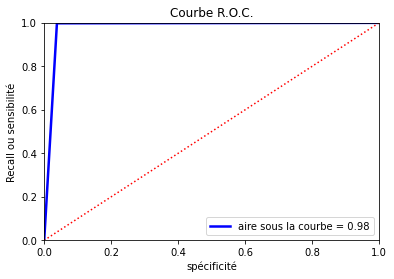

In [51]:
from sklearn.metrics import roc_auc_score , roc_curve, accuracy_score , precision_score, recall_score

fpr, tpr, _ = roc_curve(billet_km["is_genuine"],billet_km['probabilité_km'])
roc_auc = roc_auc_score(billet_km["is_genuine"],billet_km['probabilité_km'])

plt.title("Courbe R.O.C.")
plt.plot(fpr,
        tpr,
        color="blue",
        linewidth=2.5,
        label="aire sous la courbe = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1],color="red", linestyle=":")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc = "lower right")
plt.ylabel("Recall ou sensibilité")
plt.xlabel("spécificité")
plt.show()

### on voit que le modèle est très bon avec un score très proche de 1 mais légèrement moins bon qu'avec la regréssion logistique 

### évaluation sur les données test

In [47]:
x_test_km = billet_test[["diagonal","height_left","height_right","margin_up",'margin_low', "length"]]

billet_test['prediction_km'] = km.predict(x_test_km)
billet_test['probabilité_km'] = (km.predict(x_test_km) >= 0.5).astype(int)
print(billet_test[['id','prediction_km','probabilité_km']])


print("\nIndentification des billets:")
for i, k in zip(billet_test['prediction_km'],billet_test['id']):
    if i == 1:
        print('Le billet','{}'.format(k),'est vrai')
    else:
        print('Le billet','{}'.format(k),'est faux')

    id  prediction_km  probabilité_km
0  A_1              0               0
1  A_2              0               0
2  A_3              0               0
3  A_4              1               1
4  A_5              1               1

Indentification des billets:
Le billet A_1 est faux
Le billet A_2 est faux
Le billet A_3 est faux
Le billet A_4 est vrai
Le billet A_5 est vrai


In [48]:
billet_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id,probabilité_log,prediction_log,prediction_km,probabilité_km
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0.000035,0,0,0
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.000002,0,0,0
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0.000008,0,0,0
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0.994063,1,1,1
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,0.999993,1,1,1


# 6/ CONCLUSION

## Le choix du meilleur modèle se portera sur le modèle de la régression logistique qui donne de meilleurs résultats de précision, et de spécificité,et pratiquement les même resultats sur la sensibilité et le F1 score

# 7/ TEST SUR DOSSIER D'EVALUATION AVEC REGRESSION LOGISTIQUE

In [57]:
billet_eval = pd.read_csv('test_P10.csv',sep=',')
billet_eval

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [58]:
x_eval = billet_eval.drop('id',axis=1)
x_eval = sm.add_constant(x_eval)
billet_eval['probabilité_log'] = reg_log.predict(x_eval)
billet_eval['prediction_log'] = (reg_log.predict(x_eval) >= 0.5).astype(int)
print(billet_eval[['id','probabilité_log','prediction_log']])


print("Indentification des billets:")
for i, k in zip(billet_eval['prediction_log'],billet_eval['id']):
    if i == 1:
        print('Le billet','{}'.format(k),'est vrai')
    else:
        print('Le billet','{}'.format(k),'est faux')

    id  probabilité_log  prediction_log
0  B_1     9.992365e-01               1
1  B_2     2.163448e-04               0
2  B_3     9.999693e-01               1
3  B_4     1.537081e-07               0
4  B_5     1.210445e-03               0
Indentification des billets:
Le billet B_1 est vrai
Le billet B_2 est faux
Le billet B_3 est vrai
Le billet B_4 est faux
Le billet B_5 est faux
